# Trees and Networks

This a not a routing problem; but rather a assurance that all nodes are connected.  
i.e there is a path between every pair of nodes.

---
SKIP THESE

In [8]:
import numpy as np
import networkx as nx
import pygraphviz as pgv
import graphviz as gv
import pandas as pd
def render(G, engine='neato'):
    G = nx.drawing.nx_agraph.to_agraph(G)
    return gv.Source(G.string(), engine=engine)

END SKIP

---

# 1. Trees
Ta có thể tạo 1 complete graph, tuy nhiên dùng rất nhiều edges hơn cần thiết.  
Mô hình tree có 1 node trung tâm, và các nodes khác đều có path tới node trung tâm, không có cycles nào trong tree.  


A graph G is
- acyclic if there are no cycles or circuits in the graph.
- a network if it is connected.
- a tree if it is an acyclic network; that is, a graph that is both acyclic and connected.
- a forest if it is an acyclic graph.  
In addition, a vertex of degree 1 is called a leaf.

### Binary Tree:
Dùng để lưu dữ liệu chuỗi số, sau đó có thể binary search rất hiệu quả. Ví dụ:  
4, 2, 7, 10, 1, 3, 5 -> binary tree:  

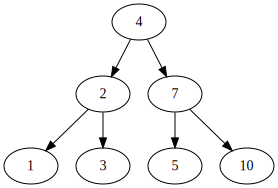

In [7]:
edges = [(4,2), (4,7), (2,1), (2,3), (7,5), (7,10)]
G = nx.DiGraph(edges)
render(G, 'dot')

Có thể tưởng tượng binary search như là lật một cuốn từ điển. Thay vì bạn lật từng trang một thì bạn so sánh từ cần kiếm với trang hiện tại, mình sẽ lật ngược hoặc xuôi từ điển.

Properties of Trees
- For every n ≥ 1, any tree with n vertices has n − 1 edges.
- For any tree with n ≥ 1 vertices, the sum of the degrees is 2n − 2.
- Every tree with at least two vertices contains at least two leaves.
- Any network on n vertices with n − 1 edges must be a tree.
- For any two vertices in a tree, there is a unique path between them.
- The removal of any edge of a tree will disconnect the graph.

# 2. Spanning trees
Find a tree within a complete graph with the least weight.  
Spanning trees are subgraph with all nodes of graph, and also are trees.
## Thuật toán Kruskal
The Optos Cable Company is expanding its ﬁber optic network over the next few years. The company will need to lay new cable, but wishes to do so with minimal cost. A cost analysis estimates \$15,000 per mile of cable installed. The distances (in miles) of required cable between any two towns is given in the table below. Determine an optimal network and its total cost.

In [9]:
names = ['Mesa', 'Natick', 'Quechee', 'Rutland', 'Tempe', 'Vinton']
data = pd.DataFrame([[0,18,35,36,20,45],
                     [18,0,50,42,40,45],
                     [35,50,0,41,25,19],
                     [36,42,41,0,37,38],
                     [20,40,25,37,0,15],
                     [45,45,19,38,15,0]],
                   columns=names, index=names)
data

,Mesa,Natick,Quechee,Rutland,Tempe,Vinton
Mesa,0,18,35,36,20,45
Natick,18,0,50,42,40,45
Quechee,35,50,0,41,25,19
Rutland,36,42,41,0,37,38
Tempe,20,40,25,37,0,15
Vinton,45,45,19,38,15,0


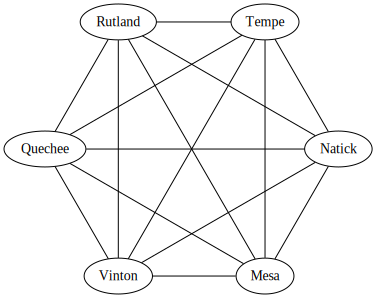

In [12]:
G = nx.from_pandas_adjacency(data)
render(G,engine='circo')

In [14]:
G.edges['Natick','Tempe']

{'weight': 40}

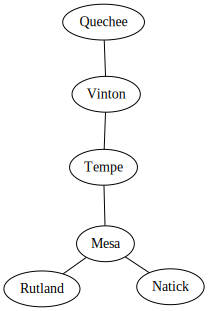

In [18]:
nG = nx.minimum_spanning_tree(G)
render(nG)

In [21]:
sum( [nG.edges[e]['weight'] for e in nG.edges])

108

In [22]:
# total cost
108 * 15000

1620000

# 3. Steiner tree , shortest network
Trong sách nói về steiner tree địa lý, dùng app **GeoGebra** .   
Networkx có algorithm để tìm steiner tree, tức là nhập một graph và node list, cho ra một graph mới với node list là minimun spanning tree.

# 4. Metric Traveling salesman
Tức là weight đại diện cho khoảng cách giữa các nodes.  
**mTSP Algorithm**  
Input: Weighted complete graph Kn , where the weight function w satisﬁes the triangle inequality.  
Steps:
1. Find a minimum spanning tree T for Kn.
2. Duplicate all the edges of T to obtain T'.
3. Find an Eulerian circuit for T'.
4. Convert the Eulerian circuit into a Hamiltonian cycle by skipping any previously visited vertex (except for the starting and ending vertex).
5. Calculate the total weight.

Output: Hamiltonian cycle for Kn .